
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades Alejandro! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

# Inicialización

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al separar la importación de bibliotecas del resto del código! Esto mejora la estructura y claridad de tu código.

</div>

# Cargar Datos

In [2]:
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
df_weather_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

* El primer CSV al tener los nombres de las compañias y el número de viajes se nombró companies "df_companies"
* El segundo CSV al tener los datos de los barrios y el promedio de viajes se nombró neihborhoods "df_neighborhoods"
* El tercer CSV al tener los datos de los viajes y las condiciones del clima se nombro weather trips "df_weather_trips"

# Preparar Datos

In [3]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_companies.duplicated().sum()

0

* Contiene 64 empresas de taxis
* No hay valores nulos (64 non-null en ambas columnas)
* Tipos de datos:
  - company_name → object (texto) ✔
  - trips_amount → int64 (numérico) ✔
* No se requieren conversiones de tipo
* El dataset está limpio y listo para análisis

In [5]:
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
df_neighborhoods.duplicated().sum()

0

* Contiene 94 barrios donde finalizaron los viajes
* Sin valores nulos
* Tipos de datos:
    - dropoff_location_name → texto ✔
    - average_trips → número decimal ✔
* El uso de float64 es correcto porque es un promedio
* No se requieren conversiones de tipo
* El dataset está limpio y listo para análisis

In [7]:
df_companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [8]:
df_neighborhoods.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo estudiando los datasets! Esto es fundamental para entender los datos y planificar el análisis.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda dejar comentarios sobre tus análisis de los mismos. 

</div>

</div>

## Identificar los 10 principales barrios en términos de finalización del recorrido

In [9]:
top_10_neighborhoods = (df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10))

top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


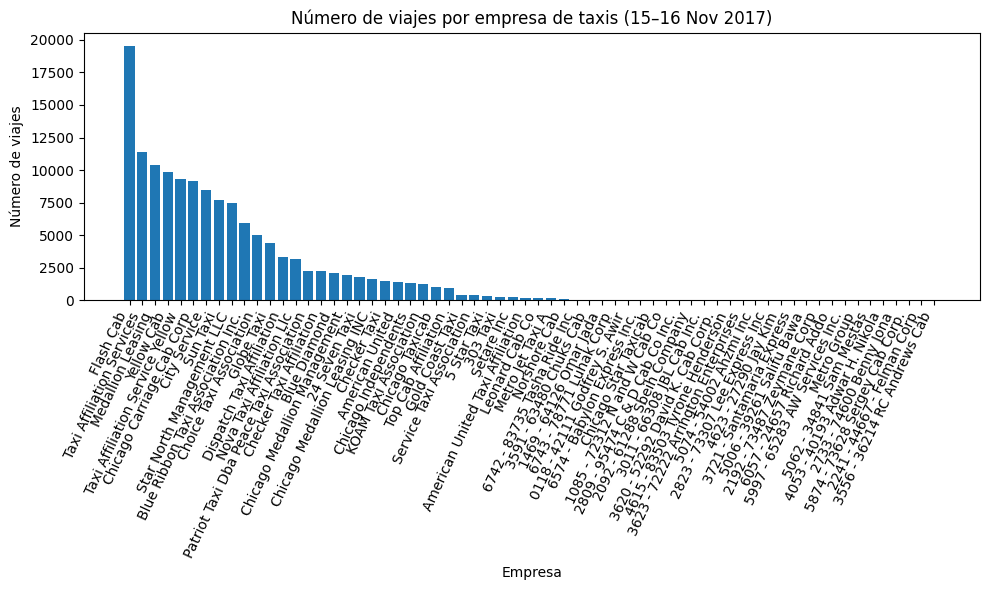

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(df_companies['company_name'], df_companies['trips_amount'])
plt.xticks(rotation=65, ha='right')
plt.title('Número de viajes por empresa de taxis (15–16 Nov 2017)')
plt.xlabel('Empresa')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()

* La primer gráfica muestra el total de viajes de cada empresa
* Si bien la gráfica es dificil de leer nos da una visión general
* El proximo paso será mostrar el top 10

In [11]:
top_10_companies = df_companies.sort_values(
    by='trips_amount',
    ascending=False
).head(10)

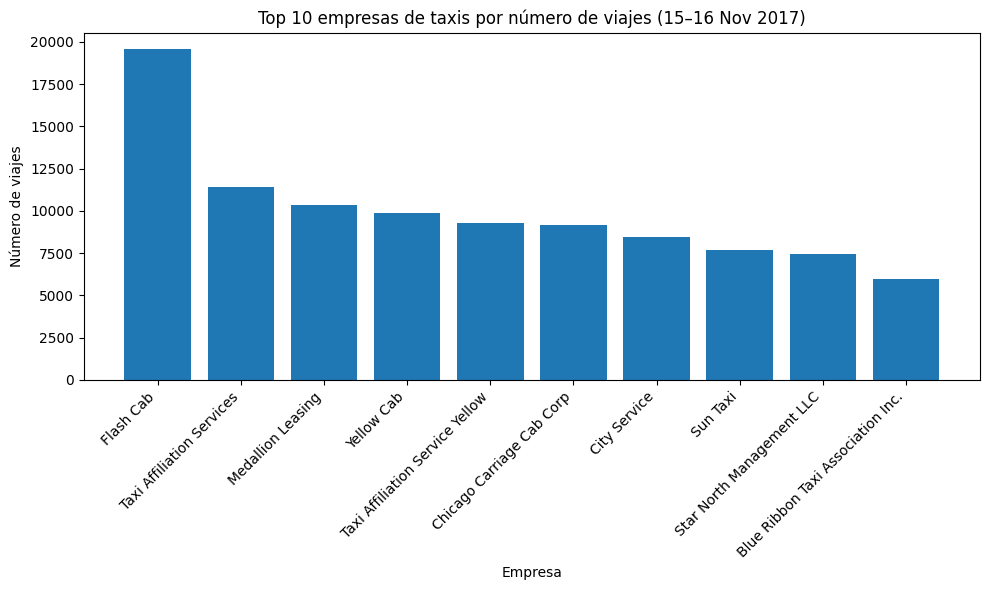

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(
    top_10_companies['company_name'],
    top_10_companies['trips_amount']
)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 empresas de taxis por número de viajes (15–16 Nov 2017)')
plt.xlabel('Empresa')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! El gráfico es correcto y refleja adecuadamente el resultado esperado.


</div>

* Flash Cab lidera claramente el mercado, con una cantidad de viajes muy superior al resto de las empresas. Esto indica una fuerte presencia operativa y una alta demanda por parte de los usuarios.
* Taxi Affiliation Services ocupa el segundo lugar, aunque con una diferencia notable respecto a Flash Cab, lo que sugiere que esta última domina el mercado durante el período analizado.

* Empresas como Medallion Leasing, Yellow Cab y Taxi Affiliation Service Yellow forman un segundo grupo con volúmenes de viajes similares entre sí.

* El resto de las empresas del top 10 presentan un número de viajes considerablemente menor, lo que evidencia una alta concentración del mercado en pocas compañías.

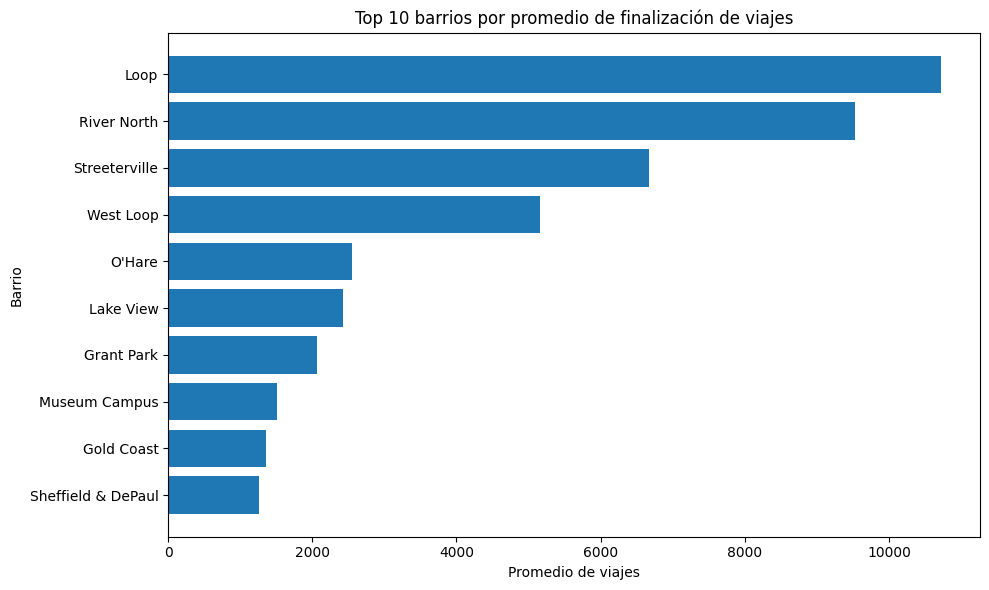

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(
    top_10_neighborhoods['dropoff_location_name'],
    top_10_neighborhoods['average_trips']
)
plt.gca().invert_yaxis()
plt.title('Top 10 barrios por promedio de finalización de viajes')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico de barras con el top 10 por barrios es excelente y los resultados son los esperados. 

</div>

* Loop destaca claramente como el barrio con mayor promedio de finalización de viajes, superando ampliamente al resto.

* River North ocupa el segundo lugar, lo que sugiere una alta demanda de transporte asociada a actividades comerciales, turísticas y de entretenimiento.

* Streeterville y West Loop también presentan promedios elevados, indicando que son zonas con alta concentración de hoteles, restaurantes y oficinas.

* O'Hare aparece dentro del top 5, lo cual es esperado debido a su importancia como principal aeropuerto de la ciudad.

* Los barrios restantes (Lake View, Grant Park, Museum Campus, Gold Coast y Sheffield & DePaul) muestran promedios menores, aunque siguen siendo zonas relevantes en términos de finalización de viajes.

In [14]:
df_weather_trips['start_ts'] = pd.to_datetime(df_weather_trips['start_ts'])
df_weather_trips['weekday'] = df_weather_trips['start_ts'].dt.weekday

In [15]:
df_saturday = df_weather_trips[df_weather_trips['weekday'] == 5]
rainy = df_saturday[df_saturday['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy = df_saturday[df_saturday['weather_conditions'] == 'Good']['duration_seconds']

In [16]:
alpha = 0.05

results = stats.ttest_ind(
    rainy,
    non_rainy,
    equal_var=False
)

results

Ttest_indResult(statistic=7.186034288068629, pvalue=6.738994326108734e-12)

In [17]:
p_value = results.pvalue

if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración cambia en sábados lluviosos.")
else:
    print("No se rechaza la hipótesis nula: no se detectaron cambios significativos.")

Rechazamos la hipótesis nula: la duración cambia en sábados lluviosos.


## Prueba de hipótesis

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda formular correctamente la hipótesis nula y la alternativa claramente al comienzo para entender el objetivo del análisis.

</div>

In [18]:
df_weather_trips = pd.read_csv('/datasets/project_sql_result_07.csv')
df_weather_trips['start_ts'] = pd.to_datetime(df_weather_trips['start_ts'])

# sábado = 5 (lunes=0)
df_weather_trips['weekday'] = df_weather_trips['start_ts'].dt.weekday

df_saturday = df_weather_trips[df_weather_trips['weekday'] == 5]

Se separan los grupos por condiciones climáticas

In [19]:
rainy_trips = df_saturday[df_saturday['weather_conditions'] == 'Bad']['duration_seconds']

good_weather_trips = df_saturday[df_saturday['weather_conditions'] == 'Good']['duration_seconds']

In [20]:
print('Duración media (lluvia):', rainy_trips.mean())
print('Duración media (buen clima):', good_weather_trips.mean())
print('Número de viajes con lluvia:', len(rainy_trips))
print('Número de viajes sin lluvia:', len(good_weather_trips))

Duración media (lluvia): 2427.2055555555557
Duración media (buen clima): 1999.6756756756756
Número de viajes con lluvia: 180
Número de viajes sin lluvia: 888


### Prueba de hipótesis (t-test de Welch)

In [21]:
alpha = 0.05

t_stat, p_value = stats.ttest_ind(
    rainy_trips,
    good_weather_trips,
    equal_var=False
)

print('p-value:', p_value)

p-value: 6.738994326108734e-12


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

In [22]:
if p_value < alpha:
    print('Rechazamos la hipótesis nula (H₀)')
else:
    print('No se rechaza la hipótesis nula (H₀)')

Rechazamos la hipótesis nula (H₀)


Se utilizó una prueba t de Welch (ttest_ind con equal_var=False)

* Las muestras tienen tamaños diferentes
* No se asume igualdad de varianzas
* Es el método más robusto para comparar medias en este contexto

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Interpretaste correctamente el valor p y sacaste conclusiones estadísticas válidas. Debemos rechazar efectivamente la hipótesis nula. 

</div>

## Conclusiones

Dado que el valor "p" es significativamente menor que el nivel de alpha (α = 0.05), se rechaza la hipótesis nula.

Esto indica que las condiciones climáticas tienen un impacto significativo en la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare los sábados.

En días lluviosos:

* Aumenta la congestión de vehículos
* Disminuye la velocidad promedio
* Se incrementa la duración de los viajes

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Dejas durante todo el proyecto comentarios correctos y conclusiones super claras.

</div>